In [2]:
from idiva.db.dbSNP import get_dbSNP_df
import pandas as pd
import os
from pathlib import Path
from idiva.io import cache_df

In [2]:
dbSNP_df = get_dbSNP_df()
print(len(dbSNP_df))
display(dbSNP_df.head())

[20:44:39 CET] Downloading dbSNP excerpt.
[20:44:39 CET] Reading dbSNP excerpt.


17454336


,chrom,pos,id,ref,alt,qual,filter,format,samples,VC,...,NSN,INT,DSS,ASS,U5,U3,R3,R5,CLNORIGIN,CLNSIG
0,NC_000017.10,9,rs1436154355,C,T,NaN,.,NaN,NaN,SNV,...,False,False,False,False,False,False,False,False,NaN,1.0
1,NC_000017.10,12,rs967120435,C,T,NaN,.,NaN,NaN,SNV,...,False,False,False,False,False,False,False,False,NaN,1.0
2,NC_000017.10,13,rs1177132252,C,T,NaN,.,NaN,NaN,SNV,...,False,False,False,False,False,False,False,False,NaN,1.0
3,NC_000017.10,22,rs1439683794,C,A,NaN,.,NaN,NaN,SNV,...,False,False,False,False,False,False,False,False,NaN,1.0
4,NC_000017.10,23,rs1051458644,A,"G,T",NaN,.,NaN,NaN,SNV,...,False,False,False,False,False,False,False,False,NaN,1.0


In [3]:
clinvar_file: str = 'vcf_37'
def maker_clinvar() -> pd.DataFrame:
    from idiva.db import clinvar_open
    from idiva.io import ReadVCF
    from idiva.db.clinvar import clinvar_to_df

    with clinvar_open(which=clinvar_file) as fd:
        return clinvar_to_df(ReadVCF(fd))


df_clinvar = cache_df(name=("clinvar_" + clinvar_file), key=[clinvar_file], df_maker=maker_clinvar)
print(len(df_clinvar))
display(df_clinvar.head())

/Users/Hendrik/opt/anaconda3/envs/cbm_project1_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (1,31) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


833155


,chrom,pos,id,ref,alt,qual,filter,format,samples,ALLELEID,...,RS,AF_ESP,AF_EXAC,AF_TGP,CLNVI,CLNSIGCONF,CLNDISDBINCL,CLNDNINCL,CLNSIGINCL,DBVARID
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,1,899892,916564,C,A,NaN,.,NaN,NaN,904889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,949358,967439,C,A,NaN,.,NaN,NaN,960396,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,949391,942967,G,A,NaN,.,NaN,NaN,929889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,949392,661610,C,T,NaN,.,NaN,NaN,626468,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,949392,661610,C,T,NaN,.,NaN,NaN,626468,...,rs950572063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### CLNSIG meaning:
0 - Uncertain significance, 1 - not provided, 2 - Benign, 3 - Likely benign, 4 - Likely pathogenic, 5 - Pathogenic, 6 - drug response, 8 - confers sensitivity, 9 - risk-factor, 10 - association, 11 - protective, 12 - conflict, 13 - affects, 255 - other

<AxesSubplot:>

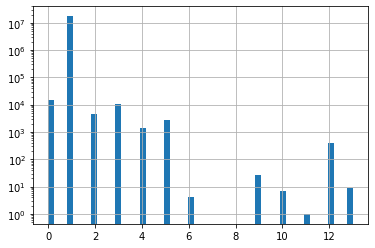

In [4]:
dbSNP_df.loc[dbSNP_df.CLNSIG != 255, 'CLNSIG'].hist(log=True, bins = 50)

In [5]:
reduced_dbSNP = dbSNP_df.loc[(dbSNP_df.CLNSIG == 2) | (dbSNP_df.CLNSIG == 5)]

<AxesSubplot:>

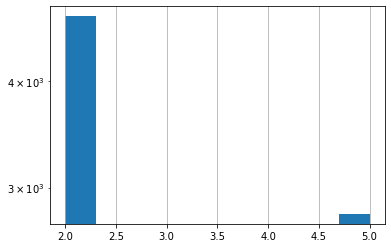

In [6]:
reduced_dbSNP['CLNSIG'].hist(log=True)

In [7]:
display(reduced_dbSNP.head())
print(reduced_dbSNP['CLNSIG'].count())

,chrom,pos,id,ref,alt,qual,filter,format,samples,VC,...,NSN,INT,DSS,ASS,U5,U3,R3,R5,CLNORIGIN,CLNSIG
82961,NC_000017.10,423051,rs2034088,T,"A,C",NaN,.,NaN,NaN,SNV,...,False,True,False,False,False,False,True,False,1.0,2.0
83354,NC_000017.10,424880,rs16953156,G,"A,T",NaN,.,NaN,NaN,SNV,...,False,False,False,False,False,False,True,False,1.0,2.0
83377,NC_000017.10,424934,rs59240016,G,C,NaN,.,NaN,NaN,SNV,...,False,False,False,False,False,False,True,False,1.0,2.0
85759,NC_000017.10,435896,rs11650424,C,T,NaN,.,NaN,NaN,SNV,...,False,True,False,False,False,True,True,False,1.0,2.0
85807,NC_000017.10,436083,rs587777465,T,C,NaN,.,NaN,NaN,SNV,...,False,False,False,False,False,False,False,False,1.0,5.0


7554


<AxesSubplot:>

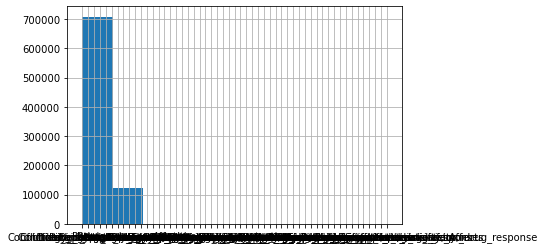

In [8]:
df_clinvar['CLNSIG'].hist()

In [9]:
df_clinvar_reduced = df_clinvar[df_clinvar['CLNSIG'].isin({'Pathogenic', 'Benign'})]
print(df_clinvar_reduced['CLNSIG'].count())

153803


# Creating a dataframe from which the label can be retrieved via pos,ref,alt
### Benign has label 0 and Pathogenic has label 1

In [10]:
merge_on_pos_ref_alt = df_clinvar_reduced[['pos', 'ref','alt', 'CLNSIG']].replace({'Pathogenic': 1, 'Benign':0}).merge(reduced_dbSNP[['pos', 'ref','alt', 'CLNSIG']].replace({'CLNSIG':{2:0,5:1}}), left_on=['pos','ref', 'alt'], right_on=['pos', 'ref','alt'], how='outer',suffixes=('_clinvar', '_dbSNP'))

### The dbSNP does bring some additional information to the clinvar file

In [11]:
merge_on_pos_ref_alt.loc[merge_on_pos_ref_alt['CLNSIG_clinvar'].isna()]

,pos,ref,alt,CLNSIG_clinvar,CLNSIG_dbSNP
153803,423051,T,"A,C",NaN,0.0
153804,424880,G,"A,T",NaN,0.0
153805,424934,G,C,NaN,0.0
153806,435896,C,T,NaN,0.0
153807,436121,G,A,NaN,0.0
...,...,...,...,...,...
159097,80915258,A,G,NaN,0.0
159098,81042874,G,A,NaN,0.0
159099,81043068,A,G,NaN,0.0
159100,81052029,C,"A,T",NaN,0.0


In [12]:
merge_on_pos_ref_alt.head()

,pos,ref,alt,CLNSIG_clinvar,CLNSIG_dbSNP
0,949422,G,A,0.0,NaN
1,949422,G,A,0.0,NaN
2,949438,A,G,0.0,NaN
3,949438,A,G,0.0,NaN
4,949523,C,T,1.0,NaN


# Creating label df

In [5]:
from idiva.db import db

db_PosRefAlt = db.get_db_label_df()

In [ ]:
print(db_PosRefAlt['pos'].max())
print(db_PosRefAlt['pos'].min())

In [ ]:
# Merging on pos, ref, alt

In [8]:
from idiva.clf.df import v0_df, join, c5_df
from idiva.download import download
from idiva.io.gz import open_maybe_gz
from idiva.io.vcf import ReadVCF
from idiva.io import cache_df

URLS = {
    'ctrl': "https://public.bmi.inf.ethz.ch/eth_intern/teaching/cbm_2020/cbm_2020_project2/control_v2.vcf.gz",
    'case': "https://public.bmi.inf.ethz.ch/eth_intern/teaching/cbm_2020/cbm_2020_project2/case_processed_v2.vcf.gz",
}

def case_control_maker():
    dfs = {}
    for group, value in URLS.items():
        with download(value).now.open(mode='rb') as fd:
            with open_maybe_gz(fd, mode='r') as fd:
                dfs[group] = c5_df(ReadVCF(fd))

    return join(case=dfs['case'], ctrl=dfs['ctrl'], on=['CHROM', 'POS', 'REF', 'ALT', 'ID'])
case_control = cache_df(name=("case_control"), key='c5_df', df_maker=case_control_maker)


In [9]:
case_control.head()

,CHROM,POS,ID,REF,ALT
Unnamed: 0,,,,,
0,17,52,rs556541063,C,A
1,17,56,rs145615430,C,T
2,17,78,rs148170422,G,C
3,17,80,rs183779916,G,A
4,17,92,rs562410061,G,T


In [21]:
dfs = {}
for group, value in URLS.items():
    with download(value).now.open(mode='rb') as fd:
        with open_maybe_gz(fd, mode='r') as fd:
            dfs[group] = c5_df(ReadVCF(fd))

In [19]:
print(case_control['POS'].max())
print(case_control['POS'].min())

81194398
52


In [22]:
merge_on_PosRefAlt = dfs['ctrl'].merge(db_PosRefAlt, left_on=['POS', 'REF', 'ALT'], right_on=['pos', 'ref', 'alt'], how='left')

In [23]:
len(merge_on_pos_ref_alt)

159102

In [12]:
merge_on_PosRefAlt = case_control.merge(db_PosRefAlt, left_on=['POS', 'REF', 'ALT'], right_on=['pos', 'ref', 'alt'], how='left')

In [11]:
print(len(merge_on_PosRefAlt))

2262261
